### Objective:

1. Using the data for redshift = 0.01 (z = 0.01), I would like for you to plot the light curve in the "i" band. 

2. Once you accomplish that, I would like for you to plot the light curve of the same source in apparent magnitude. Hint - you'll need to convert from redshift to distance and then convert from distance to distance modulus.

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy as astro

ModuleNotFoundError: No module named 'numericalunits'

In [165]:
data = pd.read_csv("/Users/kristophermortensen/Desktop/NS-NS_Light_Curve.csv")

In [166]:
data
#Note: #NAME? replaces '+inf' in the data.

,#redshift,day,u,g,r,i,z,J,H,K
0,0.01,1.06,-8.67,-10.50,-12.21,-13.85,-14.74,-14.15,-12.82,-11.92
1,0.01,1.19,-8.27,-10.31,-12.14,-13.80,-14.76,-14.15,-12.64,-11.72
2,0.01,1.33,-7.88,-10.10,-12.04,-13.76,-14.75,-14.17,-12.42,-11.20
3,0.01,1.50,-7.35,-9.89,-11.95,-13.68,-14.72,-14.20,-12.35,-10.76
4,0.01,1.68,-6.91,-9.60,-11.79,-13.59,-14.68,-14.25,-12.52,-10.66
5,0.01,1.88,-6.38,-9.26,-11.61,-13.46,-14.62,-14.27,-12.77,-10.98
6,0.01,2.11,-5.58,-8.97,-11.45,-13.34,-14.53,-14.30,-13.03,-11.38
7,0.01,2.37,-5.02,-8.51,-11.20,-13.19,-14.41,-14.32,-13.24,-11.76
8,0.01,2.66,-4.4,-7.96,-10.92,-13.01,-14.26,-14.35,-13.47,-12.23
9,0.01,2.99,-3.07,-7.53,-10.64,-12.81,-14.10,-14.39,-13.60,-12.63


In [159]:
day = data.day
i_band = data.i

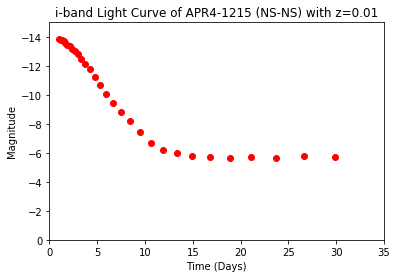

In [209]:
plt.plot(day,i_band, 'ro')
plt.axis([0,35,0,-15])
plt.title("i-band Light Curve of APR4-1215 (NS-NS) with z=0.01")
plt.xlabel("Time (Days)")
plt.ylabel("Magnitude")

In [149]:
from astropy import constants as const

In [150]:
z=0.01
#z_to_distance: number -> number
#converts redshift to distance
def z_to_distance(shift):
    return const.c*(((1+shift)**2-1)/((1+shift)**2+1))
vel=z_to_distance(z)

In [151]:
vel

<Quantity 2982935.6991238063 m / s>

In [152]:
from astropy import units as u
#Given that the Hubble Constant varies such that H_0=100h km s^-1 Mpc^-1 where 0.6 < h < 0.9, let h=0.7.
h=0.7
H_0=100*h*u.km/u.s/u.Mpc
H_0=H_0.to(u.m/u.s/u.Mpc)
D_h=const.c/H_0

#vel_to_distance: Number -> Number
#converts velocity to distance using Hubble's Law
def vel_to_distance(velocity):
    return (velocity*D_h)/const.c

In [153]:
dist = vel_to_distance(vel)
dist

<Quantity 42.61336713034008 Mpc>

In [154]:
dist=dist.to(u.pc)
dist=dist/u.pc
dist

<Quantity 42613367.13034008>

In [184]:
i_band=data.i

In [199]:
#app_mag: ListofNumbers -> ListofNumbers
#converts all the absolute magnitudes into apparent magnitudes.
def app_mag(data):
    return 5*np.log10(dist/10)+data

In [202]:
i_new=app_mag(i_band)

In [203]:
i_new

<Quantity [ 19.29772926, 19.34772926, 19.38772926, 19.46772926,
            19.55772926, 19.68772926, 19.80772926, 19.95772926,
            20.13772926, 20.33772926, 20.65772926, 20.99772926,
            21.39772926, 21.90772926, 22.47772926, 23.05772926,
            23.67772926, 24.30772926, 24.96772926, 25.73772926,
            26.48772926, 26.96772926, 27.15772926, 27.37772926,
            27.44772926, 27.49772926, 27.42772926, 27.53772926,
            27.39772926, 27.43772926]>

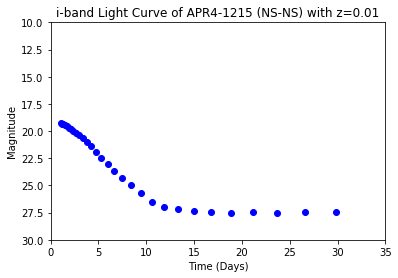

In [208]:
plt.plot(day, i_new, 'bo')
plt.axis([0,35,30,10])
plt.title("i-band Light Curve of APR4-1215 (NS-NS) with z=0.01")
plt.xlabel("Time (Days)")
plt.ylabel("Magnitude")